In [111]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from math import sqrt

In [113]:
df = pd.read_csv("SSI Historical Data.csv")

In [114]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/1/2017,13928.5,13625.2,14105.5,13574.6,10420000.0,0.02
1,12/4/2017,14712.2,14054.9,14813.3,13979.1,11520000.0,0.06
2,12/5/2017,14257.2,14661.6,14712.2,14156.1,11100000.0,-0.03
3,12/6/2017,14130.8,14206.6,14257.2,13625.2,14660000.0,-0.01
4,12/7/2017,13701.0,14130.8,14156.1,13599.9,8850000.0,-0.03


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1249 non-null   object 
 1   Price     1249 non-null   float64
 2   Open      1249 non-null   float64
 3   High      1249 non-null   float64
 4   Low       1249 non-null   float64
 5   Vol.      1249 non-null   float64
 6   Change %  1249 non-null   float64
dtypes: float64(6), object(1)
memory usage: 68.4+ KB


In [116]:
df.describe()

,Price,Open,High,Low,Vol.,Change %
count,1249.000000,1249.000000,1249.000000,1249.000000,1.249000e+03,1249.000000
mean,19021.627142,19029.526821,19362.803443,18705.430184,1.071232e+07,0.000568
std,10081.046795,10105.514290,10299.946745,9906.441351,8.454212e+06,0.027725
min,6264.400000,6318.900000,6482.300000,6046.500000,6.682300e+05,-0.070000
25%,11630.000000,11711.700000,11805.200000,11556.100000,3.800000e+06,-0.010000
50%,15445.300000,15375.400000,15723.300000,15167.200000,8.190000e+06,0.000000
75%,21260.800000,21335.200000,21700.000000,21021.900000,1.598000e+07,0.010000
max,49668.900000,50468.500000,51268.200000,48869.200000,4.780000e+07,0.090000


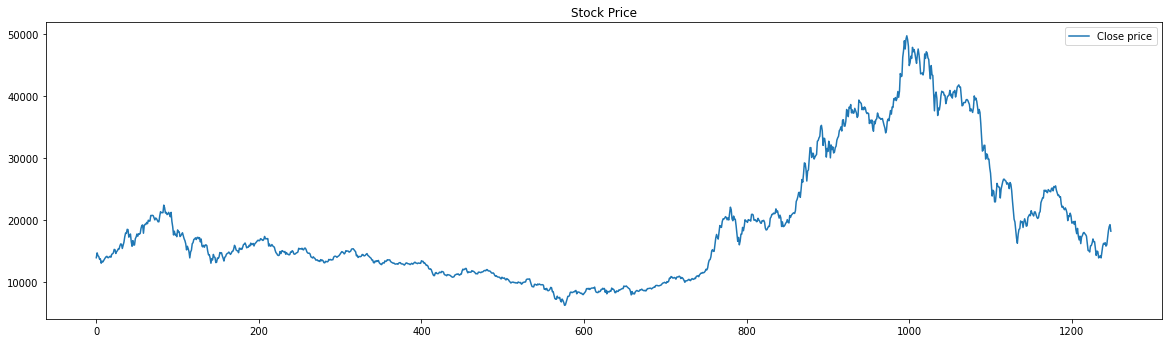

In [117]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Stock Price')
plt.plot(df.Price,label='Close price')
plt.legend()


In [118]:
stepwise_fit = auto_arima(df['Price'], trace = True, suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19560.652, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19556.765, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19554.924, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19554.819, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19554.805, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19556.627, Time=0.54 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.531 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1249
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -9776.402
Date:                Wed, 04 Jan 2023   AIC                          19554.805
Time:                        19:16:50   BIC                          19559.934
Sample:                             0   HQIC                         19556.733
                               - 1249                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.727e+05   8332.811     44.731      0.000    3.56e+05    3.89e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.11   Jarque-Bera (JB):              1010.79
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               6.17   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [119]:
def split_data(data, test_split):
    length = len(data)
    size = round(length * (1 - test_split))
    train, test = data[:size], data[size:]
    print('train:', len(train))
    print('test:', len(test))
    return train, test

In [120]:
test_split = 0.2
train, test = split_data(df, test_split)

train: 999
test: 250


In [121]:
import warnings
warnings.filterwarnings("ignore")

In [122]:
model = sm.tsa.arima.ARIMA(train['Price'], order = (4,1,0))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  999
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -7617.880
Date:                Wed, 04 Jan 2023   AIC                          15245.761
Time:                        19:16:50   BIC                          15270.290
Sample:                             0   HQIC                         15255.084
                                - 999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0185      0.020     -0.915      0.360      -0.058       0.021
ar.L2         -0.0106      0.019     -0.552      0.581      -0.048       0.027
ar.L3          0.0382      0.016      2.460      0.014       0.008       0.069
ar.L4          0.1028      0.018      5.620      0.000       0.067       0.139
sigma2      2.493e+05   5836.424     42.713      0.000    2.38e+05    2.61e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):              1437.14
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               3.15   Skew:                             0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [123]:
start = len(train)
end = len(train) + len(test) -1
pred = model.predict(start = start, end = end, typ = 'levels')

print(pred)
pred.index = df.index[start: end + 1]

999     48976.829814
1000    49169.596956
1001    49197.826135
1002    49128.609017
1003    49129.754597
            ...     
1244    49146.539189
1245    49146.539189
1246    49146.539189
1247    49146.539189
1248    49146.539189
Name: predicted_mean, Length: 250, dtype: float64


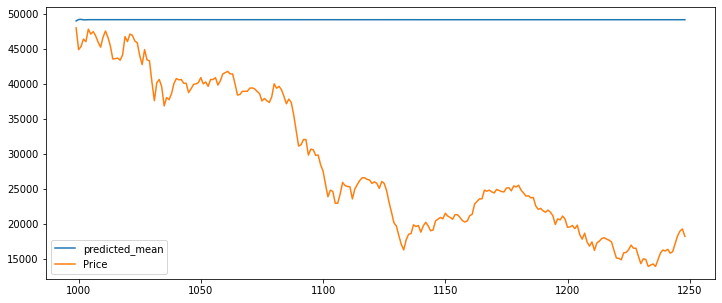

In [124]:
plt.figure(figsize = (12,5))
pred.plot(legend = True)
test['Price'].plot(legend= True)

In [125]:
# using autoarima to get best predictions
step= auto_arima(df.Price, trace=True)
step.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19560.652, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19556.765, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19554.924, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19554.819, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19554.805, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19556.627, Time=0.60 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.294 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1249
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -9776.402
Date:                Wed, 04 Jan 2023   AIC                          19554.805
Time:                        19:16:52   BIC                          19559.934
Sample:                             0   HQIC                         19556.733
                               - 1249                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.727e+05   8332.811     44.731      0.000    3.56e+05    3.89e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.11   Jarque-Bera (JB):              1010.79
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               6.17   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [126]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

mse =  mean_squared_error(pred, test['Price'])
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(pred, test['Price'])
print("RMSE: ", rmse)
print("MAPE: ", mape * 100)

RMSE:  22967.80551962206
MAPE:  41.66017056442662
